<a href="https://colab.research.google.com/github/tylerwetrust/deep-learning/blob/main/vi_lv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
white = pd.read_csv('winequality-white.csv', sep=';')
red = pd.read_csv('winequality-red.csv', sep=';')
white['label'] = 0
red['label'] = 1
frames = [white,red]
wines = pd.concat(frames)

In [19]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f1e04fb50>,
      dtype=object)

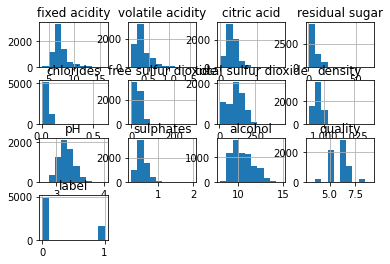

In [20]:
wines.hist()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [31]:
X = wines.loc[:, wines.columns != 'label']
Y = wines["label"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [63]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(12,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=16, validation_split
=0.2).history

Epoch 1/20
260/260 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.6281 - val_loss: 0.2338 - val_accuracy: 0.9702
Epoch 2/20
260/260 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9846 - val_loss: 0.0885 - val_accuracy: 0.9865
Epoch 3/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9927 - val_loss: 0.0572 - val_accuracy: 0.9904
Epoch 4/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9931 - val_loss: 0.0486 - val_accuracy: 0.9933
Epoch 5/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9944 - val_loss: 0.0447 - val_accuracy: 0.9942
Epoch 6/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9950 - val_loss: 0.0430 - val_accuracy: 0.9942
Epoch 7/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9962 - val_loss: 0.0414 - val_accuracy: 0.9942
Epoch 

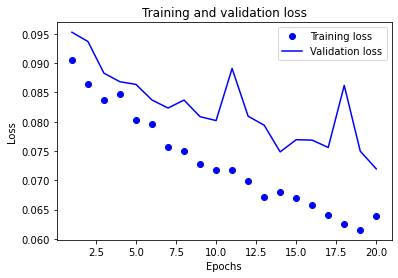

In [45]:
acc = history['accuracy']
loss_values = history['loss']
val_loss_values = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
model2 = models.Sequential()
model2.add(layers.Dense(8, activation='relu', input_shape=(12,)))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))


In [69]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
history = model2.fit(X_train, Y_train, epochs=20, batch_size=16, validation_split
=0.2).history

Epoch 1/20
260/260 [==============================] - 1s 2ms/step - loss: 0.6095 - accuracy: 0.6692 - val_loss: 0.2515 - val_accuracy: 0.9615
Epoch 2/20
260/260 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9665 - val_loss: 0.0795 - val_accuracy: 0.9827
Epoch 3/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9832 - val_loss: 0.0577 - val_accuracy: 0.9865
Epoch 4/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0518 - val_accuracy: 0.9875
Epoch 5/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9911 - val_loss: 0.0481 - val_accuracy: 0.9875
Epoch 6/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9911 - val_loss: 0.0447 - val_accuracy: 0.9913
Epoch 7/20
260/260 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9940 - val_loss: 0.0426 - val_accuracy: 0.9923
Epoch 

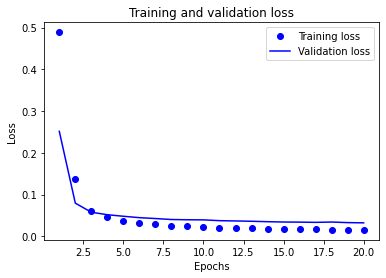

In [71]:
acc = history['accuracy']
loss_values = history['loss']
val_loss_values = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
results = model2.evaluate(X_test, Y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9938
